<a href="https://colab.research.google.com/github/AhmedAbdoulahi/DataScience/blob/master/Atelier1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import des bibliothèques utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,validation_curve

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# Lecture du dataset
# China gdp
dataSet = pd.read_csv('/content/drive/My Drive/BD/china_gdp.csv')

print ( 'avant de supprimer les valeurs en double :' ,dataSet.shape)
# Suppression des lignes en double le cas échéant
dataSet = dataSet.drop_duplicates ()
print ( 'après suppression des valeurs en double :' ,  dataSet.shape )
print("Base d'exemples: ")
dataSet.head()

Mounted at /content/drive
avant de supprimer les valeurs en double : (55, 2)
après suppression des valeurs en double : (55, 2)
Base d'exemples: 


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [ ]:
target = dataSet['Value'].values
data  = dataSet['Year'].values
target = target.reshape(-1, 1)
data = data.reshape(-1, 1)

In [ ]:
# Standardisation
scale= MinMaxScaler()
data = scale.fit_transform(data)
print(target.shape, data.shape)

(55, 1) (55, 1)


In [ ]:
X = target
X = (X+np.min(X)) / (np.max(X) - np.min(X))
X

array([[0.01027045],
       [0.00933652],
       [0.00905792],
       [0.00938893],
       [0.01025863],
       [0.01129149],
       [0.01189007],
       [0.01151926],
       [0.01131907],
       [0.01216552],
       [0.01340604],
       [0.01409053],
       [0.01540966],
       [0.01779709],
       [0.01832918],
       [0.02016344],
       [0.01923846],
       [0.02124865],
       [0.0189236 ],
       [0.02168593],
       [0.02292703],
       [0.02338483],
       [0.02427544],
       [0.02673957],
       [0.02956568],
       [0.03435775],
       [0.0335163 ],
       [0.03085278],
       [0.03467232],
       [0.03809052],
       [0.03935319],
       [0.04153413],
       [0.04575209],
       [0.04749251],
       [0.05907428],
       [0.07554386],
       [0.08804001],
       [0.09748063],
       [0.10399174],
       [0.11021693],
       [0.12145208],
       [0.13376992],
       [0.14634946],
       [0.16458962],
       [0.19289896],
       [0.22460721],
       [0.26934708],
       [0.346

In [ ]:
data

array([[0.        ],
       [0.01851852],
       [0.03703704],
       [0.05555556],
       [0.07407407],
       [0.09259259],
       [0.11111111],
       [0.12962963],
       [0.14814815],
       [0.16666667],
       [0.18518519],
       [0.2037037 ],
       [0.22222222],
       [0.24074074],
       [0.25925926],
       [0.27777778],
       [0.2962963 ],
       [0.31481481],
       [0.33333333],
       [0.35185185],
       [0.37037037],
       [0.38888889],
       [0.40740741],
       [0.42592593],
       [0.44444444],
       [0.46296296],
       [0.48148148],
       [0.5       ],
       [0.51851852],
       [0.53703704],
       [0.55555556],
       [0.57407407],
       [0.59259259],
       [0.61111111],
       [0.62962963],
       [0.64814815],
       [0.66666667],
       [0.68518519],
       [0.7037037 ],
       [0.72222222],
       [0.74074074],
       [0.75925926],
       [0.77777778],
       [0.7962963 ],
       [0.81481481],
       [0.83333333],
       [0.85185185],
       [0.870

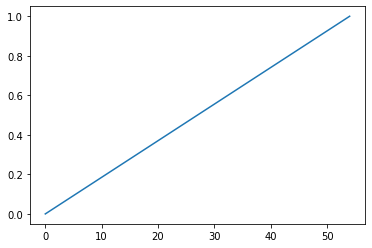

In [ ]:
plt.plot(data)

In [ ]:
#Divisons les données en ensemble d'entraînement et de test

X_train,X_test,Y_train,Y_test = train_test_split(data,X,test_size=0.15, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR

In [ ]:
model_1 = SGDRegressor(random_state=0)
model_2 = LinearRegression()
model_3 = KNeighborsRegressor(n_neighbors=2)
model_4 = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, Y_train)
    print(model.__class__.__name__, model.score(X_test, Y_test))

SGDRegressor 0.19676566193006306
LinearRegression -1.9670489702302225
KNeighborsRegressor 0.7549041101414333
SVR -0.5710693044535315


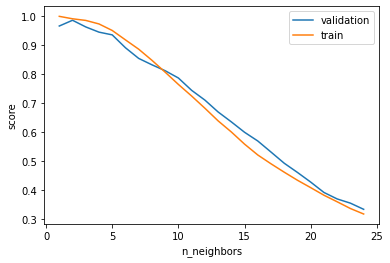

In [ ]:
model = KNeighborsRegressor()
k = np.arange(1, 25)

train_score, val_score = validation_curve(model, X_train, Y_train,
                                          param_name='n_neighbors',
                                          param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [ ]:
target = dataSet['Value'].values
data  = dataSet['Year'].values
target = target.reshape(-1, 1)
data = data.reshape(-1, 1)

In [ ]:
dt = PolynomialFeatures(4).fit_transform(data)

In [ ]:
# Standardisation
scale= MinMaxScaler()
df = scale.fit_transform(dt)
print(target.shape, df.shape)

(55, 1) (55, 5)


In [ ]:
X = target
X = (X+np.min(X)) / (np.max(X) - np.min(X))

In [ ]:
#Divisons les données en ensemble d'entraînement et de test

X_train,X_test,Y_train,Y_test = train_test_split(df,X,test_size=0.15, random_state=0)

In [ ]:
model_1 = SGDRegressor(random_state=0)
model_2 = LinearRegression()
model_3 = KNeighborsRegressor(n_neighbors=2)
model_4 = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, Y_train)
    print(model.__class__.__name__, model.score(X_test, Y_test))

SGDRegressor -0.41658328566836755
LinearRegression 0.8834472627991155
KNeighborsRegressor 0.9719843267620693
SVR -0.27910297103513915


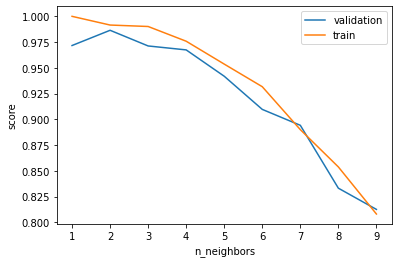

In [ ]:
model = KNeighborsRegressor()
k = np.arange(1, 10)

train_score, val_score = validation_curve(model, X_train, Y_train,
                                          param_name='n_neighbors',
                                          param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [ ]:
# le nombre de voisins optimal est aux environs de 10
model = KNeighborsRegressor(2)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9719843267620693

In [ ]:
ypred = model.predict(X_test)

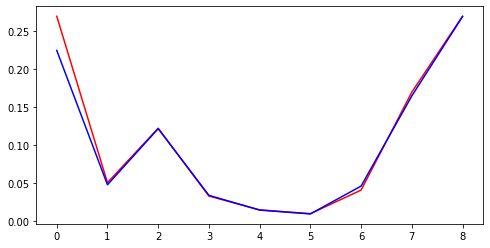

In [ ]:
# courbe de comparaison des prédictions et valeurs réelles
plt.figure(figsize=(8,4))
plt.plot(ypred, '-r', Y_test, '-b')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(Y_test, ypred)
mae = mean_absolute_error(Y_test,ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))
print("MAE :",mae)

MSE:  0.00023193518102477783
RMSE:  0.015229418275980794
MAE : 0.0067200577749547095
